In [0]:
#https://www.kaggle.com/mksaad/arabic-sentiment-analysis-in-tweets-nb-bow
#https://github.com/saobou/arabic-text-preprocessing/blob/master/Preprocess.ipynb
import numpy as np 
import pandas as pd

In [0]:
import nltk
from nltk import NaiveBayesClassifier
from nltk.metrics.scores import f_measure, precision, recall
import collections

In [0]:
pos_dataset = pd.read_csv('train_Arabic_tweets_positive_20190413.tsv',sep='\t', encoding='utf-8')

In [0]:
neg_dataset = pd.read_csv('train_Arabic_tweets_negative_20190413.tsv',sep='\t', encoding="utf-8")

In [0]:
neg_dataset.head

<bound method NDFrame.head of       Sentiment                                               Text
0           neg  اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1           neg  توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2           neg  #الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3           neg  نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4           neg                             الدودو جايه تكمل علي 💔
...         ...                                                ...
22509       neg  كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...
22510       neg                                  احسدك على الايم 💔
22511       neg                            لأول مرة ما بنكون سوا 💔
22512       neg                                 بقله ليش يا واطي 🤔
22513       neg  قد طال صبري في النوى إذ تركتني كئيبا ؛ غريبا ب...

[22514 rows x 2 columns]>

In [0]:
pos_dataset['Text'][1]

'وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال في روحك أماالمنبهرون بالمظا…'

In [0]:
pos = pd.DataFrame(columns=['Text','Label'])

In [0]:
neg = pd.DataFrame(columns=['Text','Label'])

In [0]:
pos_tweets=[]
neg_tweets=[]
pos_sent=[]
neg_sent=[]
for i in range(len(pos_dataset)):
  pos_tweets.append(pos_dataset['Text'][i])
  pos_sent.append(1)

for i in range(len(neg_dataset)):
  neg_tweets.append(neg_dataset['Text'][i])
  neg_sent.append(0)

In [0]:
pos_tweets[1]

'وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال في روحك أماالمنبهرون بالمظا…'

In [0]:
neg_tweets[1]

'توقعت اذا جات داريا بشوفهم كاملين بس لي للحين احس فيه احد ناقصهم 💔 #Avlu'

In [0]:
text=[]
Label=[]
for tweet in pos_tweets:
  text.append(tweet)
  Label.append(1)
for tweet in neg_tweets:
  text.append(tweet)
  Label.append(0)

In [0]:
data = pd.DataFrame(columns=['Text','Labels'])

In [0]:
data['Text'] = text
data['Labels'] = Label

In [0]:
data

,Text,Labels
0,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...,1
1,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...,1
2,من الخير نفسه 💛,1
3,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...,1
4,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...,1
...,...,...
45270,كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...,0
45271,احسدك على الايم 💔,0
45272,لأول مرة ما بنكون سوا 💔,0
45273,بقله ليش يا واطي 🤔,0


### Arabic text cleaning

In [0]:
!pip install Tashaphyne
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from textblob import TextBlob
import re

from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer

stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}
ArListem = ArabicLightStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Stemming

In [0]:
# def to_arabic(text):
#     return ds.transliterate(text)

def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)

#### Normalizing Text

In [0]:
import pyarabic.araby as araby
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

#### Stop Words Removal

In [0]:
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

### Dealing with Hashtags in string

In [0]:
def split_hashtag_to_words(tag):
    tag = tag.replace('#','')
    tags = tag.split('_')
    if len(tags) > 1 :
        
        return tags
    pattern = re.compile(r"[A-Z][a-z]+|\d+|[A-Z]+(?![a-z])")
    return pattern.findall(tag)

def clean_hashtag(text):
    words = text.split()
    text = list()
    for word in words:
        if is_hashtag(word):
            text.extend(extract_hashtag(word))
        else:
            text.append(word)
    return " ".join(text)
def is_hashtag(word):
    if word.startswith("#"):
        return True
    else:
        return False
def extract_hashtag(text):
    
    hash_list = ([re.sub(r"(\W+)$", "", i) for i in text.split() if i.startswith("#")])
    word_list = []
    for word in hash_list :
        word_list.extend(split_hashtag_to_words(word))
    return word_list

### MISC

In [0]:
def misc():
  import re
  import pyarabic.araby as araby

  import warnings
  warnings.filterwarnings("ignore", category=DeprecationWarning)

  # test sample
  tweet1 = u'جهود تُبذل عامًا بعد عام تعبّر عن ترابط الجسد الواحد لخدمة ضيوف الرحمن؛ تطبيق ترجمان الفائز في #هاكاثون_الحج العام الماضي، ينطلق اليوم ليشارك الحجاج أيامهم الروحانية ويساعدهم في ترجمة اللوح الإرشادية في منطقة الحرم دون الحاجة إلى انترنت @reem. #حج_ذكي'



  # removes usernames inside a tweet text caused by to mentions or reply tweets
  def remove_usernames(input_txt, pattern):
      r = re.findall(pattern, input_txt)
      for i in r:
          input_txt = re.sub(i, '', input_txt)

      return input_txt

  # removes arabic letters tashkeel like (ِ ًٍ ٌ  ّ ْ )
  def remove_tashkeel(input_txt):
      return araby.strip_tashkeel(input_txt)

  # removes a decorative letter (ـ) which has no affect on words meaning
  def remove_tatweel(input_txt):
      return araby.strip_tatweel(input_txt)

  # normalizes the different forms of the letter hamza (ئ ؤ) into a single form (ء)
  def normalize_hamza(input_txt):
      r = re.findall(u'ئ',input_txt);
      e = re.findall(u'ؤ',input_txt);
      for i in r:
          input_txt= re.sub(i, u'ء', input_txt)
      for i in e:
          input_txt= re.sub(i, u'ء', input_txt)
      return input_txt

  # normalizes the different forms of the letter alef (آ أ إ) into a single form (ا)
  def normalize_alef(input_txt):
      r = re.findall(u'أ',input_txt);
      e = re.findall(u'إ',input_txt);
      o = re.findall(u'آ', input_txt);
      for i in r:
          input_txt= re.sub(i, u'ا', input_txt)
      for i in e:
          input_txt= re.sub(i, u'ا', input_txt)
      for i in o:
          input_txt= re.sub(i, u'ا', input_txt)
      return input_txt

  # normalizes the different forms of the letter yeh (ي ى) into a single form (ى)
  def normalize_yeh(input_txt):
      r = re.findall(u'ي', input_txt)
      for i in r:
          input_txt = re.sub(i, u'ى', input_txt)
      return input_txt

  # normalizes the different forms of the letter heh (ه ة) into a single form (ة)
  def normalize_heh(input_txt):
      r = re.findall(u'ه', input_txt)
      for i in r:
          input_txt = re.sub(i, u'ة', input_txt)
      return input_txt

  # combining all preprocessing functions together for testing samples
  def full_preprocessing_steps(tweet):

      print("Tweet before preprocessing: " + tweet)

      usernames_free = remove_usernames(tweet,  "@[\w]*")
      tashkeel_free = remove_tashkeel(usernames_free)
      tatweel_free = remove_tatweel(tashkeel_free)
      hamza_normalized = normalize_hamza(tatweel_free)
      alef_normalized = normalize_alef(hamza_normalized)
      yeh_normalized = normalize_yeh(alef_normalized)
      heh_normalized = normalize_heh(yeh_normalized)

      print("Tweet after preprocessing: " + heh_normalized)

  full_preprocessing_steps(tweet1)

In [0]:
def clean_tweet(text):
    text = re.sub('#\d+K\d+', ' ', text)  # years like 2K19
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('@[^\s]+',' ',text)
    text = clean_hashtag(text)
    # text = clean_emoji(text)
    return text

#### Cleaning Data

In [0]:
def clean_text(text):
    ## Clean for tweets
    text = clean_tweet(text)
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    ## Remove Emojis
   
    ## Convert text to lowercases
    text = text.lower()
    ## Arabisy the text
    # text = to_arabic(text)
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    text = normalizeArabic(text)
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    #Stemming
    #text = stem(text)
    return text

In [0]:
data['Text'] = data['Text'].apply(lambda x:clean_text(x))

In [0]:
data['Text'][1]

'النهايه يبقيٰ معك احدالا رايٰ الجمال روحك اماالمنبهرون بالمظا…'

### Random Shuffling of data

In [0]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index()
data.head

<bound method NDFrame.head of                                                     Text  Labels
10472              ⠀⠀ ⠀⠀ لغيرك رحل شوقي ولا حنت مٓسافاتي       1
25256  المال الحب حاجه رتويت حقيقي ✴️ وبشكل يومي لتغر...       0
15125                      اللهم امين يارب العالمين وياك       1
31710                              وش يقول يبن حميد ترجم       0
10216  والله اعتقد فريقي يشجعه اشكال اللحجي ابوظهر وا...       1
...                                                  ...     ...
36823                                هه وش نسوي با القلب       0
10353        هه الله يسعدك ويكتبلك خير معليش مستحيل اقو…       1
20417                     مبروك فوز زعيمنا الهلال الاهلي       1
37791                                        صلوو بيجيكم       0
40604  مدري ليه ماملين تشيلسي وهازارد السيناريو اللي ...       0

[45275 rows x 2 columns]>

In [0]:
data

,Text,Labels
10472,⠀⠀ ⠀⠀ لغيرك رحل شوقي ولا حنت مٓسافاتي,1
25256,المال الحب حاجه رتويت حقيقي ✴️ وبشكل يومي لتغر...,0
15125,اللهم امين يارب العالمين وياك,1
31710,وش يقول يبن حميد ترجم,0
10216,والله اعتقد فريقي يشجعه اشكال اللحجي ابوظهر وا...,1
...,...,...
36823,هه وش نسوي با القلب,0
10353,هه الله يسعدك ويكتبلك خير معليش مستحيل اقو…,1
20417,مبروك فوز زعيمنا الهلال الاهلي,1
37791,صلوو بيجيكم,0


#### Common Words Removal

In [0]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:12]
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#### Rare words removal

In [0]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-50:]
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [0]:
data

,Text,Labels
10472,⠀⠀ ⠀⠀ لغيرك رحل شوقي ولا حنت مٓسافاتي,1
25256,المال الحب حاجه حقيقي ✴️ وبشكل يومي لتغريداتك ...,0
15125,امين العالمين وياك,1
31710,وش يقول يبن حميد ترجم,0
10216,اعتقد فريقي يشجعه اشكال اللحجي ابوظهر والزلابه...,1
...,...,...
36823,هه وش نسوي با القلب,0
10353,هه يسعدك ويكتبلك خير معليش مستحيل اقو…,1
20417,مبروك فوز زعيمنا,1
37791,صلوو بيجيكم,0


### Final Cleaning and Preparing Dataset

In [0]:
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    return (sum(len(word) for word in words)/len(words))

data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data['char_count'] = data['Text'].str.len() ## this also includes spaces
data['avg_char_per_word'] = data['Text'].apply(lambda x: avg_word(x))
stop = stopwords.words('arabic')
data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data = data.sort_values(by='word_count',ascending=[0])
final = []
for index, row in data.iterrows():
    if len(row['Text'].split()) > 3:
        final.append([row['Text'],row['Labels']])
df = pd.DataFrame(final)
df.columns = ['Text','Sentiment']
df.to_csv('final_data.csv',index=False)

In [0]:
data

,Text,Labels,word_count,char_count,avg_char_per_word,stopwords
21606,متوكلين وبك نظن الظن الجميل قدرا جميلا وخيرا ي...,1,954,5644,4.917191,0
11893,يحول جديد حزنك ستشرق بالله ابتسم تشغل اذكر يذك...,1,802,4645,4.793017,1
4388,بدايه الصباح اسالك ايام حلوه تورد الحياه بداخل...,1,775,4525,4.840000,3
26034,الان كسرت وانا ظللت متماسكا لفتره طويله جدا فق...,0,747,4243,4.681392,2
20866,وصوتها امان يحضن قلبي مسمعي وحدي سهرانه باقي ا...,1,732,4275,4.841530,0
...,...,...,...,...,...,...
15240,عيوني,1,1,5,5.000000,0
32258,شاء,0,1,3,3.000000,0
29499,ازاد,0,1,4,4.000000,0
16603,يالدنياا,1,1,8,8.000000,0


In [0]:
from sklearn.model_selection import train_test_split
data.dropna()
X_train, X_test, Y_train, Y_test = train_test_split(data['Text'],data['Labels'], test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(40747,) (40747,)
(4528,) (4528,)


In [0]:
from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 128
EMBEDDING_DIM = 100

Using TensorFlow backend.


In [0]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS,lower=False)
tokenizer.fit_on_texts(np.concatenate((X_train, X_test)).ravel())

In [0]:
Y_train = pd.get_dummies(Y_train).values
Y_test = pd.get_dummies(Y_test).values


In [0]:
Y_train[1]

array([0, 1], dtype=uint8)

In [0]:
from keras.preprocessing.sequence import pad_sequences
X_train_tokenized = pad_sequences(tokenizer.texts_to_sequences(X_train.values.ravel()),maxlen=MAX_SEQUENCE_LENGTH)
X_test_tokenized = pad_sequences(tokenizer.texts_to_sequences(X_test.values.ravel()),maxlen=MAX_SEQUENCE_LENGTH)

In [0]:
X_train_tokenized.shape

(40747, 128)

In [0]:
X_train_tokenized[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0, 11565,  2886,    78, 11566,   475,   597,  1920,
         259,  1867]

In [0]:
# from sklearn import decomposition
# pca = decomposition.PCA(n_components=100)
# pca.fit(X_train_tokenized)
# X_train_tokenized = pca.transform(X_train_tokenized)

In [0]:
# x_train[1]

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout , GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train_tokenized.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 128, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 128, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 5,017,090
Trainable params: 5,017,090
Non-trainable params: 0
_________________________________________________________________


In [0]:
epochs = 1
batch_size = 128

In [0]:
history = model.fit(X_train_tokenized, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 36672 samples, validate on 4075 samples
Epoch 1/1
36672/36672 [==============================] - 78s 2ms/step - loss: 0.0912 - acc: 0.9589 - val_loss: 0.8261 - val_acc: 0.7764


In [0]:
accr = model.evaluate(X_test_tokenized,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

4528/4528 [==============================] - 3s 565us/step
Test set
  Loss: 0.693
  Accuracy: 0.775


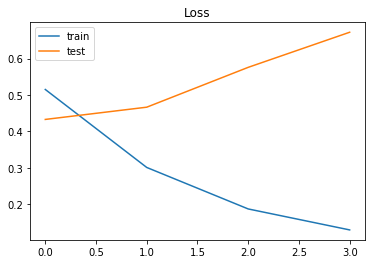

In [0]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

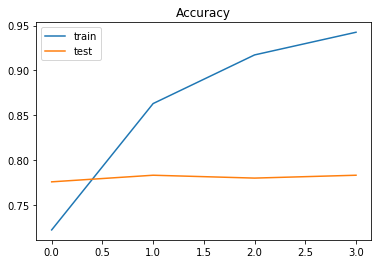

In [0]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [0]:
def predictor(str):
  new_tweet = [str]
  seq = tokenizer.texts_to_sequences(new_tweet)
  padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
  pred = model.predict(padded)
  if(np.argmax(pred)) == 0:
    return "Negative"
  else:
    return "Positive"

In [0]:
predictor()

'Positive'